## 1. Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info:\n")
df.info()
print(df.describe())

Shape of the dataset: (1338, 7)

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000   

## 2. Cleaning

### 1. Missing Values

In [4]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='missing_percent', ascending=False)
print(missing)

          missing_count  missing_percent
age                   0              0.0
sex                   0              0.0
bmi                   0              0.0
children              0              0.0
smoker                0              0.0
region                0              0.0
charges               0              0.0


### 2. Handling Missing Values

In [5]:
num_cols = ['age', 'bmi', 'children', 'charges']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

print("Missing Values after Cleaning:\n", df.isnull().sum())

Missing Values after Cleaning:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_21564\3338228276.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


### 3. Duplicates & Datatypes

In [6]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows after cleaning:", df.duplicated().sum())

df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

Duplicate rows: 1
Duplicate rows after cleaning: 0


## 3. Univariate, Bivariate & Multivariate Analysis

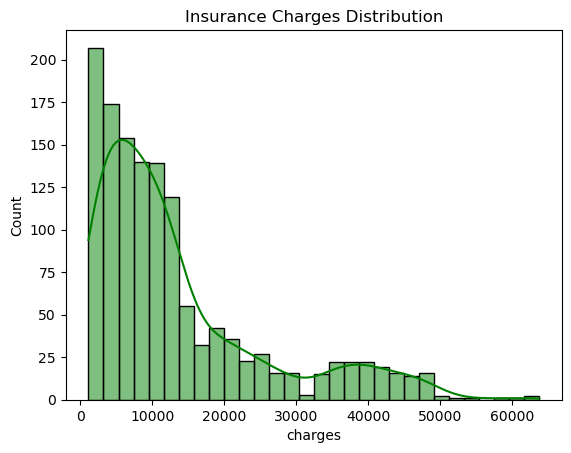

In [7]:
# Univariate Analysis - Charges
sns.histplot(df['charges'], bins=30, kde=True, color='green')
plt.title('Insurance Charges Distribution')
plt.show()

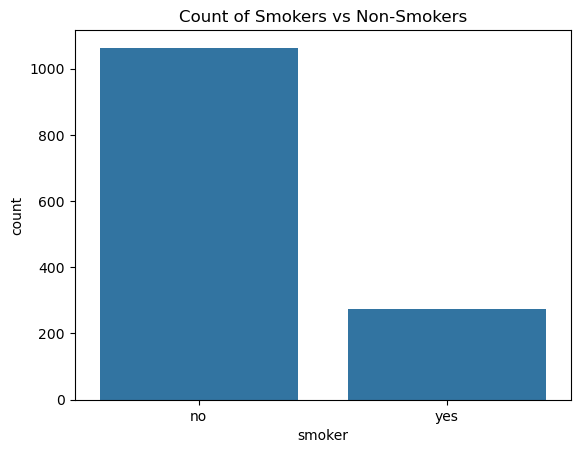

In [8]:
# Univariate Analysis - Smoker
sns.countplot(x='smoker', data=df)
plt.title('Count of Smokers vs Non-Smokers')
plt.show()

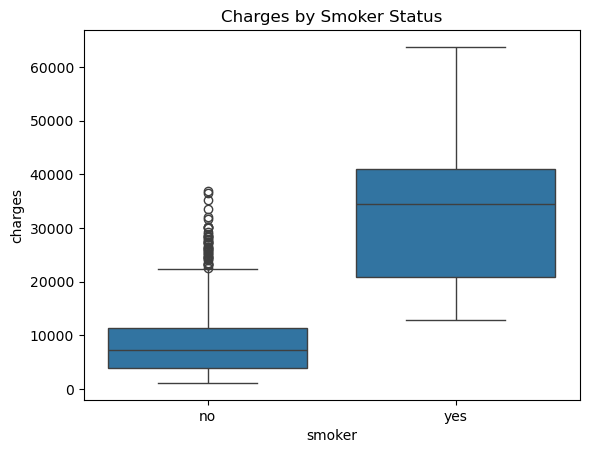

In [9]:
# Bivariate Analysis - Charges by Smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

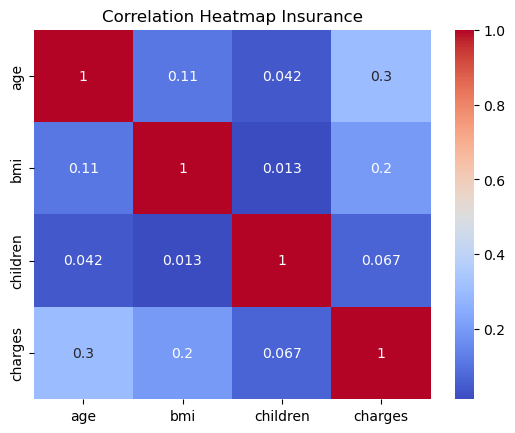

In [10]:
# Correlation Heatmap
corr_cols = ['age', 'bmi', 'children', 'charges']
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Insurance')
plt.show()

## 4. Outlier Detection on Charges

In [11]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = df[(df['charges'] < lower) | (df['charges'] > upper)]
print("Outliers in charges:", len(outliers))

Outliers in charges: 139


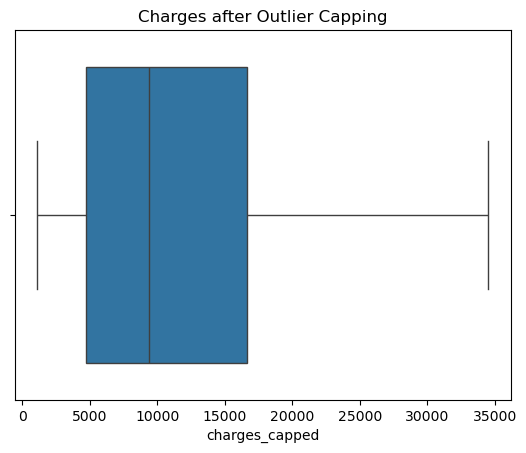

In [12]:

df['charges_capped'] = df['charges'].clip(lower, upper)
sns.boxplot(x=df['charges_capped'])
plt.title('Charges after Outlier Capping')
plt.show()

## 5. Feature Engineering
#### e.g. Create age groups or BMI classes

## 6. Key Insights
#### - Smoking status strongly increases charges.
#### - Age and BMI moderately positively correlate with charges.

## Export cleaned dataset

In [13]:
df.to_csv('Insurance_cleaned.csv', index=False)
print("Cleaned Medical Insurance data saved as Insurance_cleaned.csv")

Cleaned Medical Insurance data saved as Insurance_cleaned.csv
